# 📞 Predicting Customer Churn for a Telecom Company

This notebook demonstrates a complete ML pipeline for predicting customer churn in a telecom dataset.

## 📂 Data Loading

In [1]:
import pandas as pd

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 🧹 Data Cleaning and Preparation

In [2]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop unnecessary columns
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

# Fix target variable and drop rows with missing churn
if df['Churn'].isna().sum() > 0:
    df = df.dropna(subset=['Churn'])

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print('Remaining missing in Churn:', df['Churn'].isna().sum())
df.head()

Remaining missing in Churn: 0


<ipython-input-2-397752cce153>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 🎯 Target and Feature Preparation

In [3]:
X = df.drop(columns='Churn')
y = df['Churn']

print('Features shape:', X.shape)
print('Target distribution:\n', y.value_counts(normalize=True))

Features shape: (7043, 19)
Target distribution:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


## 🔥 Handling Categorical and Numeric Features

In [4]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print('Numeric columns:', numeric_cols.tolist())
print('Categorical columns:', categorical_cols.tolist())

Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## ⚙️ Preprocessing Pipeline

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

## ✂️ Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)
print('Train size:', X_train.shape, '| Test size:', X_test.shape)

Train size: (5634, 19) | Test size: (1409, 19)


## 🚀 Model Pipeline

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

## 🔧 Hyperparameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 20]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
print('Best parameters:', grid.best_params_)

Best parameters: {'model__max_depth': 10, 'model__n_estimators': 200}


## 🧪 Model Evaluation

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.69      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409

ROC-AUC Score: 0.738268878038699


## 📊 Confusion Matrix

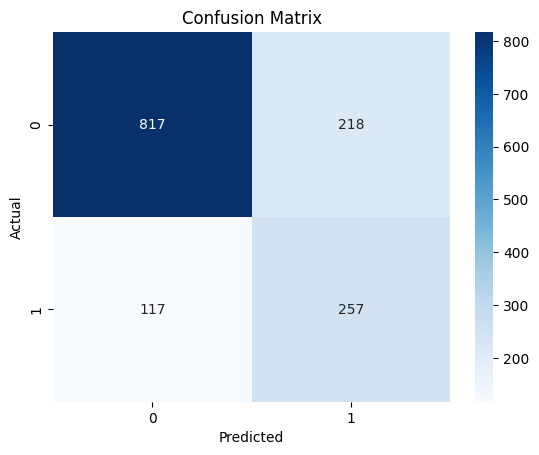

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 📈 ROC Curve

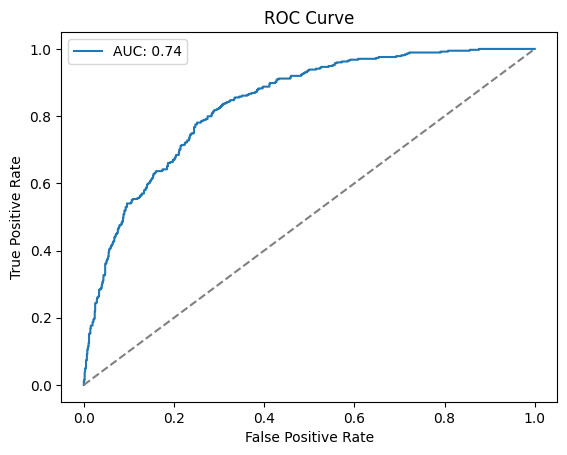

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred)))
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

## 🔮 Predicting on a New Customer

In [12]:
new_customer = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 900.5
}])

prediction = grid.predict(new_customer)
print('Predicted churn:', prediction)

Predicted churn: [1]


## 💡 Conclusion
✅ Cleaned data and handled missing target values  
✅ Dropped unnecessary columns to avoid errors  
✅ Tuned hyperparameters and evaluated model  
✅ Ready to predict churn for new customers!